In [7]:
import sklearn
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.datasets import load_boston
%matplotlib inline

In [6]:
boston=load_boston()
boston_df=pd.DataFrame(boston.data , columns=boston.feature_names)
# target(価格中央値)
boston_df['MEDV']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


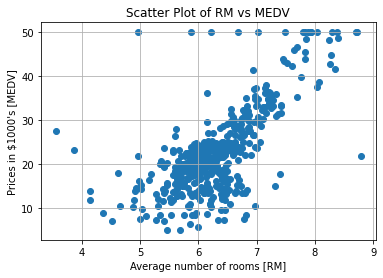

In [8]:
plt.scatter(boston_df['RM'],boston_df['MEDV']) # 平均部屋数と住宅価格の散布図をプロット

plt.title('Scatter Plot of RM vs MEDV')    # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()


In [10]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# 単回帰分析

In [12]:
from sklearn.linear_model import LinearRegression 

# LRinstance
lr=LinearRegression()

X=boston_df[['RM']].values
Y=boston_df[['MEDV']].values

lr.fit(X,Y)

LinearRegression()

In [18]:
print('coeddicient = ',lr.coef_[0][0])
print('intercept = ',lr.intercept_[0])


coeddicient =  9.102108981180308
intercept =  -34.670620776438554


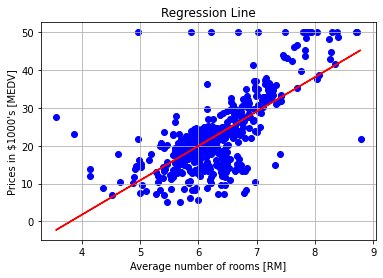

In [19]:
plt.scatter(X,Y ,color='blue')
plt.plot(X,lr.predict(X),color='red')

plt.title('Regression Line')               # 図のタイトル
plt.xlabel('Average number of rooms [RM]') # x軸のラベル
plt.ylabel('Prices in $1000\'s [MEDV]')    # y軸のラベル
plt.grid()                                 # グリッド線を表示

plt.show()                                 # 図の表示

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 

# Holdout
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=5)
# LRinstance
lr=LinearRegression()


lr.fit(X_train,Y_train)

LinearRegression()

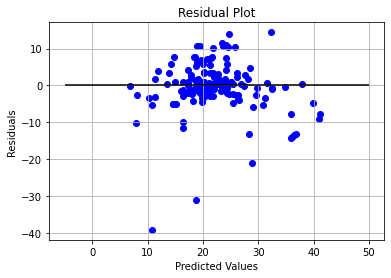

In [30]:
# 残差プロット
Y_pred=lr.predict(X_test)

plt.scatter(Y_pred,Y_pred-Y_test,color='blue')
plt.hlines(y=0,xmin=-5,xmax=50,color='black')

plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()                                               # 図の表示

In [31]:
from sklearn.metrics import mean_squared_error as mse 
Y_train_pred=lr.predict(X_train)

print('MSE train data: ' ,mse(Y_train,Y_train_pred))
print('MSE test data: ' ,mse(Y_test,Y_pred))


MSE train data:  42.33920623202014
MSE test data:  46.68491330777206


In [33]:
from sklearn.metrics import r2_score

print('r^2 train data: ', r2_score(Y_train, Y_train_pred))
print('r^2 test data: ', r2_score(Y_test, Y_pred))

r^2 train data:  0.4696811450822286
r^2 test data:  0.5090306525796445


# 重回帰分析

In [34]:
X,y=load_boston(return_X_y=True)
# Holdout
X_train,X_test,Y_train,Y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=5)

In [35]:
# LRinstance
lr=LinearRegression()

lr.fit(X_train,Y_train)

LinearRegression()

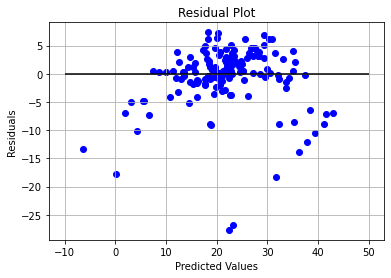

In [37]:
# 残差プロット
Y_pred=lr.predict(X_test)

plt.scatter(Y_pred,Y_pred-Y_test,color='blue')
plt.hlines(y=0,xmin=-10,xmax=50,color='black')

plt.title('Residual Plot')                                # 図のタイトル
plt.xlabel('Predicted Values')                            # x軸のラベル
plt.ylabel('Residuals')                                   # y軸のラベル
plt.grid()                                                # グリッド線を表示

plt.show()                                               # 図の表示

In [38]:
from sklearn.metrics import mean_squared_error as mse 
Y_train_pred=lr.predict(X_train)

print('MSE train data: ' ,mse(Y_train,Y_train_pred))
print('MSE test data: ' ,mse(Y_test,Y_pred))


MSE train data:  19.06834185092723
MSE test data:  30.697037704088714
